# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals.On any given day, many professionals who are interested in the courses land on their website and browse for courses and considered as leads.The Objective of this Business growth is to convert possible leads into hot leads and help the learners to take the couse and make the conversion rate of the company from 30% to 80%.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
leads_df = pd.read_csv(r'C:\Users\Aditi Saini\Downloads\Leads.csv')

In [3]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.shape

(9240, 37)

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Cleaning the Data

In [6]:
# replacing data points having select to null as no option is select by the lead
leads_df = leads_df.replace('Select',np.nan)

In [7]:
# checking null values
round(leads_df.isnull().sum()/len(leads_df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
# dropping the columns having greater then 30% null values as it can effect the analysis
col = leads_df.columns[(round(leads_df.isnull().sum()/len(leads_df),2)*100)>40]
leads_df = leads_df.drop(col,1)

In [9]:
# remaining null values
(round(leads_df.isnull().sum()/len(leads_df),2)*100).sort_values(ascending=False)

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
Total Time Spent on Website                       0.0
Last Notable Activity                             0.0
A free copy of Mastering The Interview            0.0
Search                      

In [10]:
# dropping unnecessary columns
unnec_col=['Prospect ID','Lead Number','Last Notable Activity','City','Country','Tags',
              'Update me on Supply Chain Content', 'Get updates on DM Content','Receive More Updates About Our Courses',
              'I agree to pay the amount through cheque','Magazine']

leads_df.drop(unnec_col,axis=1,inplace=True)

In [11]:
# replacing null values with mode
leads_df['Specialization'] = leads_df['Specialization'].fillna(leads_df['Specialization'].mode()[0])

In [12]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna(leads_df['What matters most to you in choosing a course'].mode()[0])

In [13]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna(leads_df['What is your current occupation'].mode()[0])

In [14]:
leads_df['Last Activity'] = leads_df['Last Activity'].fillna(leads_df['Last Activity'].mode()[0])

In [15]:
# replacing null values with zero
leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(0)

In [16]:
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].fillna(0)

In [17]:
# checking for null values again
(round(leads_df.isnull().sum()/len(leads_df),2)*100).sort_values(ascending=False)

A free copy of Mastering The Interview           0.0
Last Activity                                    0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Specialization                                   0.0
Through Recommendations                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Lead Origin                                   

In [18]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


# Data Visualization

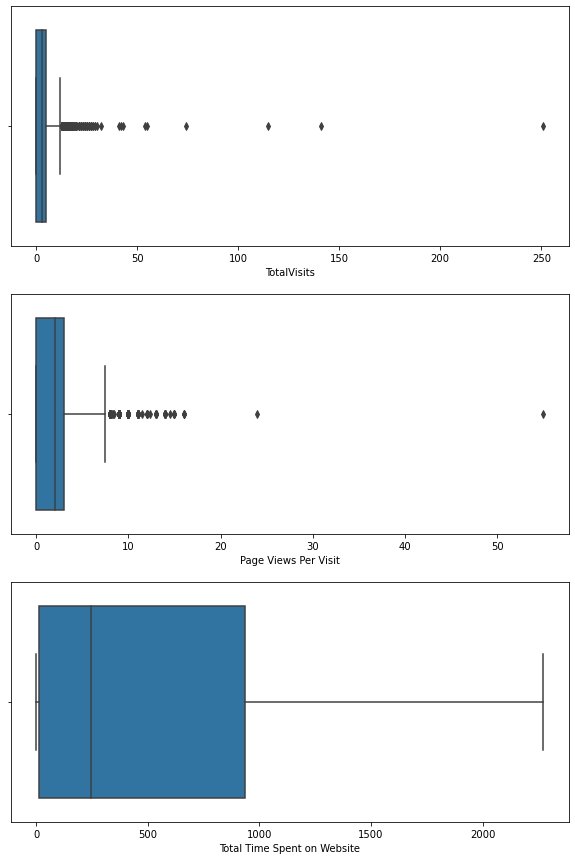

In [19]:
# Finding the outliers/ plotting numerical variables
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(leads_df['TotalVisits'])
plt.subplot(3,1,2)
sns.boxplot(leads_df['Page Views Per Visit'])
plt.subplot(3,1,3)
sns.boxplot(leads_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

Total visits and page views per visit seems to have outliers but those outlier can also considered as hot leads as they are visiting website a lot of times.

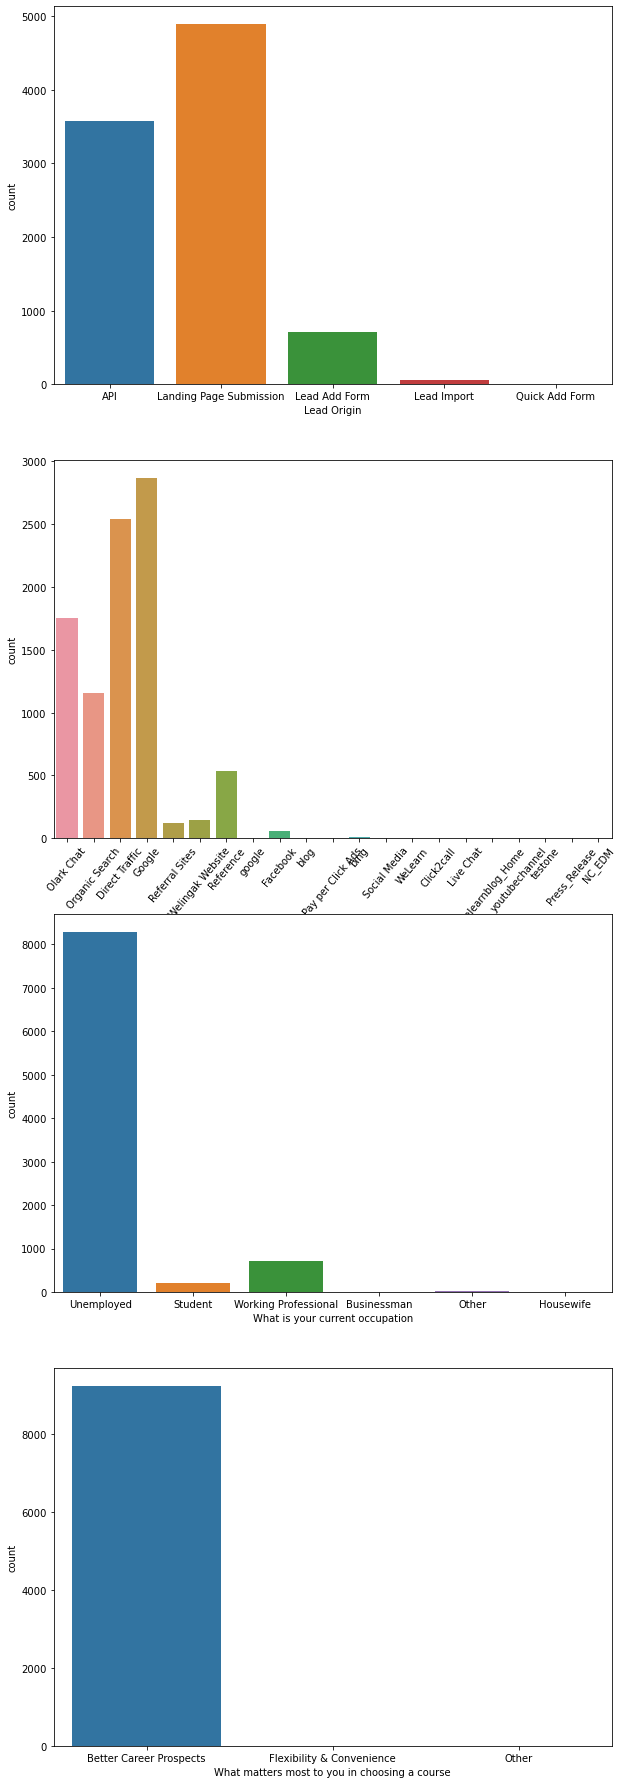

In [20]:
# plotting categorical variables
plt.figure(figsize = (10,32))
plt.subplot(4,1,1)
sns.countplot(leads_df['Lead Origin'])
plt.subplot(4,1,2)
plt.xticks(rotation=50)
sns.countplot(leads_df['Lead Source'])
plt.subplot(4,1,3)
sns.countplot(leads_df['What is your current occupation'])
plt.subplot(4,1,4)
sns.countplot(leads_df['What matters most to you in choosing a course'])
plt.show()

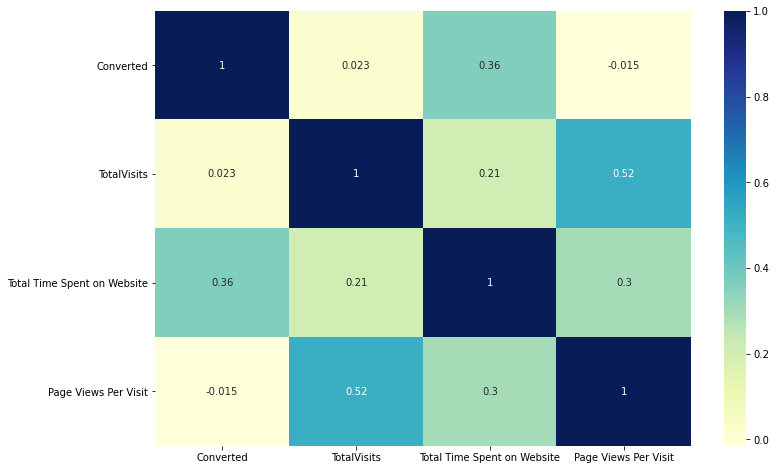

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(leads_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

Clearly Total visits have positive correlation with Page views per visit and Total time spend have positive correlation with Converted

# Data Preparation

In [22]:
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [23]:
var_list=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

#defining the map
def binary_op(x):
    return x.map({'Yes':1,'No':0})

#Applying the function to the data for converion
leads_df[var_list] = leads_df[var_list].apply(binary_op)

In [24]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0


In [25]:
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [26]:
# Creating dummies of Categorical Variables
dummies = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course']], drop_first = True)

In [27]:
leads_df = pd.concat([leads_df, dummies],axis = 1)

In [28]:
leads_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [29]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train Test Split

In [30]:
import sklearn 
from sklearn.model_selection import train_test_split

In [31]:
X = leads_df.drop(['Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
y = leads_df['Converted']

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# scaling the Features
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,0,0,0.109111,0.005716,-0.452487,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3516,0,0,0.297808,-0.691418,0.083827,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0,0,0.297808,1.365219,1.229797,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3934,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [37]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
rfe = RFE(lg, 15)
rfe = rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Search', False, 31),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 35),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 16),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 42),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 32),
 ('Lead Source_Reference', False, 1

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [40]:
X_train = X_train[col]
X_test = X_test[col]

# Building the model

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
X_train = sm.add_constant(X_train)
log1 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.8
Date:                Sun, 21 May 2023   Deviance:                       5483.7
Time:                        17:02:36   Pearson chi2:                 9.59e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3783      0.054    -25.760      0.000      -1.483      -1.273
Do Not Email                                            -1.1698      0.187     -6.250      0.000      -1.537      -0.803
Total Time Spent on Website                              1.0920      0.039     28.066      0.000       1.016       1.168
Newspaper                                              -24.8414   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                3.6209      0.189     19.179      0.000       3.251       3.991
Lead Source_Olark Chat                                   1.1491      0.101     11.385      0.000       0.951       1.347
Lead Source_Welingak Website                             1.9663      0.749      2.626      0.009       0.499       3.434
Lead Source_google                                     -22.5127   3.31e+04     -0.001      0.999    -6.5e+04    6.49e+04
Last Activity_Converted to Lead                         -1.2408      0.218     -5.680      0.000      -1.669      -0.813
Last Activity_Email Bounced                             -0.9163      0.343     -2.675      0.007      -1.588      -0.245
Last Activity_Had a Phone Conversation                   2.2427      0.674      3.329      0.001       0.922       3.563
Last Activity_Olark Chat Conversation                   -1.3937      0.163     -8.548      0.000      -1.713      -1.074
Last Activity_SMS Sent                                   1.1973      0.073     16.342      0.000       1.054       1.341
Specialization_Hospitality Management                   -0.8497      0.317     -2.684      0.007      -1.470      -0.229
What is your current occupation_Housewife               23.9413   2.26e+04      0.001      0.999   -4.43e+04    4.43e+04
What is your current occupation_Working Professional     2.8423      0.187     15.207      0.000       2.476       3.209
========================================================================================================================
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.44
9,Last Activity_Email Bounced,1.71
1,Do Not Email,1.69
5,Lead Source_Olark Chat,1.44
4,Lead Origin_Lead Add Form,1.36
11,Last Activity_Olark Chat Conversation,1.29
2,Total Time Spent on Website,1.25
6,Lead Source_Welingak Website,1.22
12,Last Activity_SMS Sent,1.14
15,What is your current occupation_Working Profes...,1.09


In [44]:
X_train = X_train.drop('Newspaper', axis=1)

In [45]:
log2 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.4
Date:                Sun, 21 May 2023   Deviance:                       5486.7
Time:                        17:02:36   Pearson chi2:                 9.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3792      0.053    -25.780      0.000      -1.484      -1.274
Do Not Email                                            -1.1691      0.187     -6.248      0.000      -1.536      -0.802
Total Time Spent on Website                              1.0897      0.039     28.040      0.000       1.014       1.166
Lead Origin_Lead Add Form                                3.6194      0.189     19.173      0.000       3.249       3.989
Lead Source_Olark Chat                                   1.1476      0.101     11.373      0.000       0.950       1.345
Lead Source_Welingak Website                             1.9660      0.749      2.626      0.009       0.499       3.433
Lead Source_google                                     -21.5109   2.01e+04     -0.001      0.999   -3.94e+04    3.94e+04
Last Activity_Converted to Lead                         -1.2386      0.218     -5.672      0.000      -1.667      -0.811
Last Activity_Email Bounced                             -0.9145      0.342     -2.671      0.008      -1.586      -0.243
Last Activity_Had a Phone Conversation                   2.2432      0.673      3.331      0.001       0.923       3.563
Last Activity_Olark Chat Conversation                   -1.3925      0.163     -8.542      0.000      -1.712      -1.073
Last Activity_SMS Sent                                   1.1985      0.073     16.364      0.000       1.055       1.342
Specialization_Hospitality Management                   -0.8478      0.317     -2.678      0.007      -1.468      -0.227
What is your current occupation_Housewife               22.9419   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.8428      0.187     15.212      0.000       2.477       3.209
========================================================================================================================
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.44
8,Last Activity_Email Bounced,1.71
1,Do Not Email,1.69
4,Lead Source_Olark Chat,1.44
3,Lead Origin_Lead Add Form,1.36
10,Last Activity_Olark Chat Conversation,1.29
2,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.22
11,Last Activity_SMS Sent,1.14
14,What is your current occupation_Working Profes...,1.09


In [47]:
X_train = X_train.drop('Lead Source_google', axis=1)

In [48]:
log3 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.9
Date:                Sun, 21 May 2023   Deviance:                       5489.8
Time:                        17:02:36   Pearson chi2:                 9.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3819      0.053    -25.835      0.000      -1.487      -1.277
Do Not Email                                            -1.1731      0.187     -6.275      0.000      -1.540      -0.807
Total Time Spent on Website                              1.0895      0.039     28.041      0.000       1.013       1.166
Lead Origin_Lead Add Form                                3.6214      0.189     19.182      0.000       3.251       3.991
Lead Source_Olark Chat                                   1.1493      0.101     11.389      0.000       0.952       1.347
Lead Source_Welingak Website                             1.9660      0.749      2.626      0.009       0.499       3.433
Last Activity_Converted to Lead                         -1.2360      0.218     -5.660      0.000      -1.664      -0.808
Last Activity_Email Bounced                             -0.9087      0.342     -2.654      0.008      -1.580      -0.238
Last Activity_Had a Phone Conversation                   2.2461      0.673      3.335      0.001       0.926       3.566
Last Activity_Olark Chat Conversation                   -1.3911      0.163     -8.534      0.000      -1.711      -1.072
Last Activity_SMS Sent                                   1.2006      0.073     16.394      0.000       1.057       1.344
Specialization_Hospitality Management                   -0.8462      0.317     -2.673      0.008      -1.467      -0.226
What is your current occupation_Housewife               22.9442   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.8445      0.187     15.221      0.000       2.478       3.211
========================================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.44
7,Last Activity_Email Bounced,1.71
1,Do Not Email,1.69
4,Lead Source_Olark Chat,1.44
3,Lead Origin_Lead Add Form,1.36
9,Last Activity_Olark Chat Conversation,1.29
2,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.22
10,Last Activity_SMS Sent,1.14
13,What is your current occupation_Working Profes...,1.09


In [50]:
X_train = X_train.drop('What is your current occupation_Housewife', axis=1)

In [51]:
log4 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.9
Date:                Sun, 21 May 2023   Deviance:                       5503.9
Time:                        17:02:36   Pearson chi2:                 9.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3726      0.053    -25.743      0.000      -1.477      -1.268
Do Not Email                                            -1.1771      0.187     -6.296      0.000      -1.544      -0.811
Total Time Spent on Website                              1.0886      0.039     28.050      0.000       1.013       1.165
Lead Origin_Lead Add Form                                3.6372      0.188     19.305      0.000       3.268       4.006
Lead Source_Olark Chat                                   1.1428      0.101     11.338      0.000       0.945       1.340
Lead Source_Welingak Website                             1.9447      0.749      2.598      0.009       0.477       3.412
Last Activity_Converted to Lead                         -1.2440      0.218     -5.699      0.000      -1.672      -0.816
Last Activity_Email Bounced                             -0.9142      0.343     -2.669      0.008      -1.586      -0.243
Last Activity_Had a Phone Conversation                   2.2370      0.673      3.322      0.001       0.917       3.557
Last Activity_Olark Chat Conversation                   -1.3961      0.163     -8.566      0.000      -1.715      -1.077
Last Activity_SMS Sent                                   1.1923      0.073     16.299      0.000       1.049       1.336
Specialization_Hospitality Management                   -0.8521      0.317     -2.692      0.007      -1.473      -0.232
What is your current occupation_Working Professional     2.8389      0.187     15.192      0.000       2.473       3.205
========================================================================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.44
7,Last Activity_Email Bounced,1.71
1,Do Not Email,1.69
4,Lead Source_Olark Chat,1.44
3,Lead Origin_Lead Add Form,1.35
9,Last Activity_Olark Chat Conversation,1.29
2,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.22
10,Last Activity_SMS Sent,1.14
12,What is your current occupation_Working Profes...,1.09


P-value and VIF both seems to be good. Now we are left with 12 columns.

# Model Evaluation

In [53]:
# looking at predicted values
y_train_pred=res.predict(X_train)
y_train_pred[:10]

1871    0.232617
6795    0.203208
3516    0.272406
8105    0.786826
3934    0.232617
4844    0.990867
3297    0.102744
8071    0.999138
987     0.123793
7423    0.877525
dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23261748, 0.20320771, 0.27240583, 0.78682633, 0.23261748,
       0.99086651, 0.10274387, 0.99913848, 0.12379349, 0.87752487])

In [55]:
y_train_pred_df = pd.DataFrame({'Converted':y_train,'Converted_prob':y_train_pred})
y_train_pred_df.head()

,Converted,Converted_prob
1871,0,0.232617
6795,0,0.203208
3516,0,0.272406
8105,0,0.786826
3934,0,0.232617


In [56]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_df['Predicted'] = y_train_pred_df.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_prob,Predicted
1871,0,0.232617,0
6795,0,0.203208,0
3516,0,0.272406,0
8105,0,0.786826,1
3934,0,0.232617,0


# Confusion metrics

In [57]:
from sklearn import metrics

In [58]:
confusion = metrics.confusion_matrix(y_train_pred_df.Converted,y_train_pred_df.Predicted)
confusion

array([[3576,  426],
       [ 856, 1610]], dtype=int64)

In [59]:
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)

0.8017934446505876

In [60]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [61]:
# Calculating the sensitivity
TP/(TP+FN)

0.6528791565287916

In [62]:
# Calculating the specificity
TN/(TN+FP)

0.8935532233883059

# Plotting ROC curve

In [63]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [64]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_prob, drop_intermediate = False )

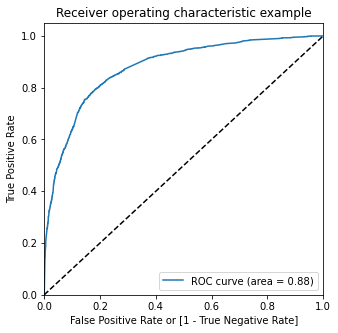

In [65]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_prob)

We have good area value of 0.88

# Finding Optimal Cutoff

In [66]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.232617,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.203208,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.272406,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.786826,1,1,1,1,1,1,1,1,1,0,0
3934,0,0.232617,0,1,1,1,0,0,0,0,0,0,0


In [67]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.580705  0.971208  0.340080
0.2   0.2  0.726654  0.919303  0.607946
0.3   0.3  0.796228  0.830900  0.774863
0.4   0.4  0.812771  0.761557  0.844328
0.5   0.5  0.801793  0.652879  0.893553
0.6   0.6  0.791280  0.582320  0.920040
0.7   0.7  0.777829  0.505677  0.945527
0.8   0.8  0.745671  0.379562  0.971264
0.9   0.9  0.711967  0.263585  0.988256


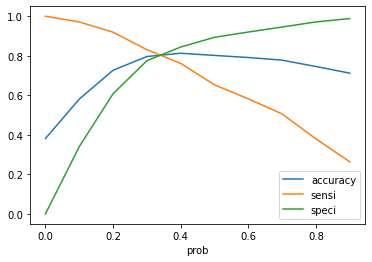

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can see that the optimal cut off is 0.35

In [69]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_df.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.232617,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.203208,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.272406,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.786826,1,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.232617,0,1,1,1,0,0,0,0,0,0,0,0


In [70]:
# Let's check the overall accuracy
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.806895485466914

In [71]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion2

array([[3255,  747],
       [ 502, 1964]], dtype=int64)

In [72]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [73]:
# Calculating the sensitivity
TP/(TP+FN)

0.7964314679643146

In [74]:
# Calculating the specificity
TN/(TN+FP)

0.8133433283358321

# Making predictions on Test set

In [75]:
X_train.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [76]:
X_test[['Total Time Spent on Website']]=scaler.fit_transform(X_test[['Total Time Spent on Website']])

In [77]:
test_cols=X_train.columns[1:]
X_test_final=X_test[test_cols]

In [78]:
X_test_final=sm.add_constant(X_test_final)
y_pred_test=res.predict(X_test_final)

In [79]:
y_pred_test

4269    0.697500
2376    0.922464
7766    0.646164
9199    0.068723
4359    0.783132
          ...   
8649    0.144232
2152    0.922464
7101    0.229630
5331    0.412130
2960    0.922464
Length: 2772, dtype: float64

In [80]:
y_pred_test_final=pd.DataFrame({'Converted':y_test,'Converted_probability':y_pred_test,'Prospect ID':y_test.index})

In [81]:
y_pred_test_final.head()

,Converted,Converted_probability,Prospect ID
4269,1,0.697500,4269
2376,1,0.922464,2376
7766,1,0.646164,7766
9199,0,0.068723,9199
4359,1,0.783132,4359


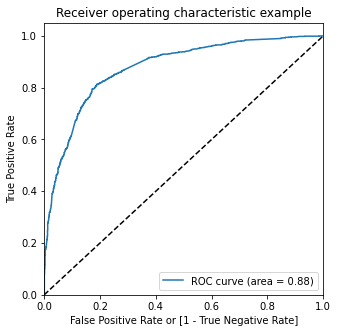

In [82]:
# drawing ROC curve
draw_roc(y_pred_test_final.Converted, y_pred_test_final.Converted_probability)

In [83]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset
y_pred_test_final['Predicted']=y_pred_test_final['Converted_probability'].map(lambda x:1 if x > 0.35 else 0 ) 

y_pred_test_final.head()

,Converted,Converted_probability,Prospect ID,Predicted
4269,1,0.697500,4269,1
2376,1,0.922464,2376,1
7766,1,0.646164,7766,1
9199,0,0.068723,9199,0
4359,1,0.783132,4359,1


In [84]:
# accuracy score
metrics.accuracy_score(y_pred_test_final.Converted, y_pred_test_final.Predicted)

0.8142135642135642

In [85]:
# confusion metrics
confusion2 = metrics.confusion_matrix(y_pred_test_final.Converted,y_pred_test_final.Predicted)
confusion2

array([[1390,  287],
       [ 228,  867]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.7917808219178082

In [88]:
# Calculating the specificity
TN/(TN+FP)

0.8288610614192009

We have a fair score of accuracy,sensitivity and specificity which is 81%,79% and 83% for test set

And 80%, 81%, 80% for train set respectively.